In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

Let's load the dataset first. We will use our favourite Titanic Dataset to do the comparison and for ease of understanding

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Let's do some processing on the dataset to see if there are null values and extract some columns from the dataset which we will use in our final models

In [4]:
titanic = titanic.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]
#Encode the Sex column to values of 0 and 1 for our model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [5]:
#Check for na values
titanic.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool

<b> We see there are NA values in age. Let's investigate <b>

In [6]:
# Read the DataFrame, first using the feature data
titanic[titanic['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


For our use case, we'll be dropping off the na values

In [7]:
titanic.dropna(inplace=True)
# We no longer have any na values
titanic[titanic['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


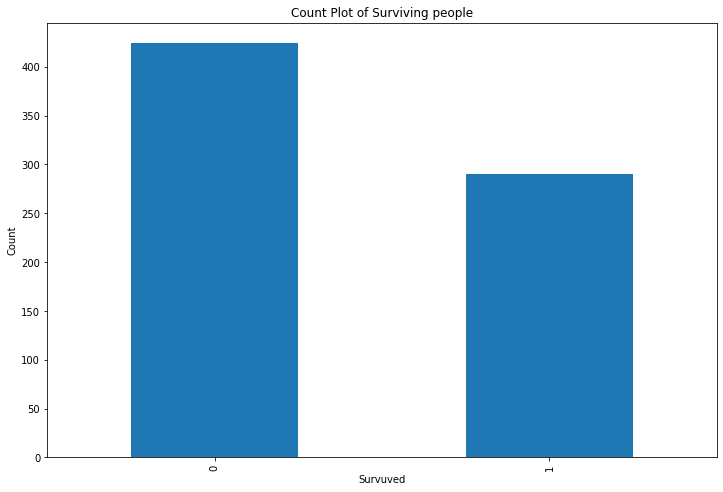

In [8]:
plt.figure(figsize=(12,8))
titanic['Survived'].value_counts().plot(kind="bar",title='Count Plot of Surviving people',ylabel='Count',xlabel='Survuved') 
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x = titanic.drop(columns='Survived')
y = titanic['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0) #stratify=y ensures that the proportion of species in any sample remains the same
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(571, 6)
(143, 6)
(571,)
(143,)


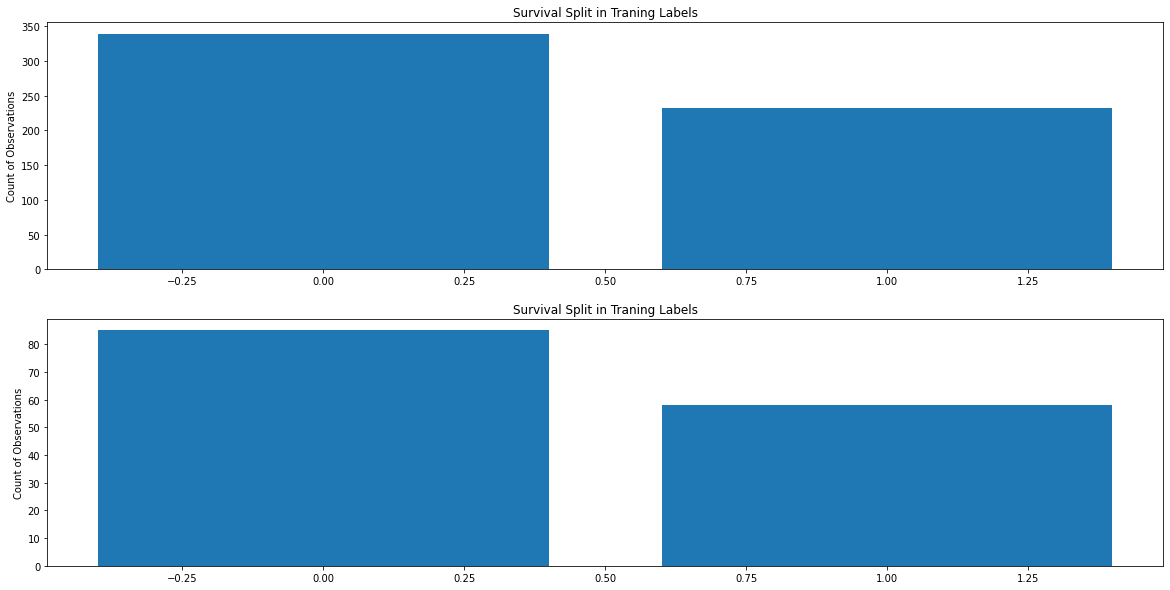

In [11]:

fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].bar(y_train.value_counts().index,y_train.value_counts())
ax[0].set_title('Survival Split in Traning Labels')
ax[0].set_ylabel('Count of Observations')


ax[1].bar(y_test.value_counts().index,y_test.value_counts())
ax[1].set_title('Survival Split in Traning Labels')
ax[1].set_ylabel('Count of Observations')

plt.show()


## Decision Tree Baseline Model

Fitting this dataset on the basic decision tree model

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=0)
dc_model.fit(x_train,y_train)
y_train_pred_dc = dc_model.predict(x_train)
y_test_pred_dc = dc_model.predict(x_test)

test_accuracy_dc = accuracy_score(y_test_pred_dc,y_test)
train_accuracy_dc = accuracy_score(y_train_pred_dc,y_train)
print("Train Accuracy Score : {}".format(train_accuracy_dc))
print("Test Accuracy Score : {}".format(test_accuracy_dc))

Train Accuracy Score : 0.9929947460595446
Test Accuracy Score : 0.7482517482517482


In [13]:
print("Test Confusion Matrix \n {}".format(confusion_matrix(y_test_pred_dc,y_test)))
print("\n Train Confusion Matrix \n {}".format(confusion_matrix(y_train_pred_dc,y_train)))

Test Confusion Matrix 
 [[66 17]
 [19 41]]

 Train Confusion Matrix 
 [[339   4]
 [  0 228]]


<b> It's clearly visible that the model is overfitting due to the stark difference in the train and test accuracy difference and the number of false positive and negatives are also higher in the test dataset <b>


Let's try to visualise this tree as well. As we clearly see in the figure below there are a lot of rules associated with this model and it becomes difficult to handle new test data

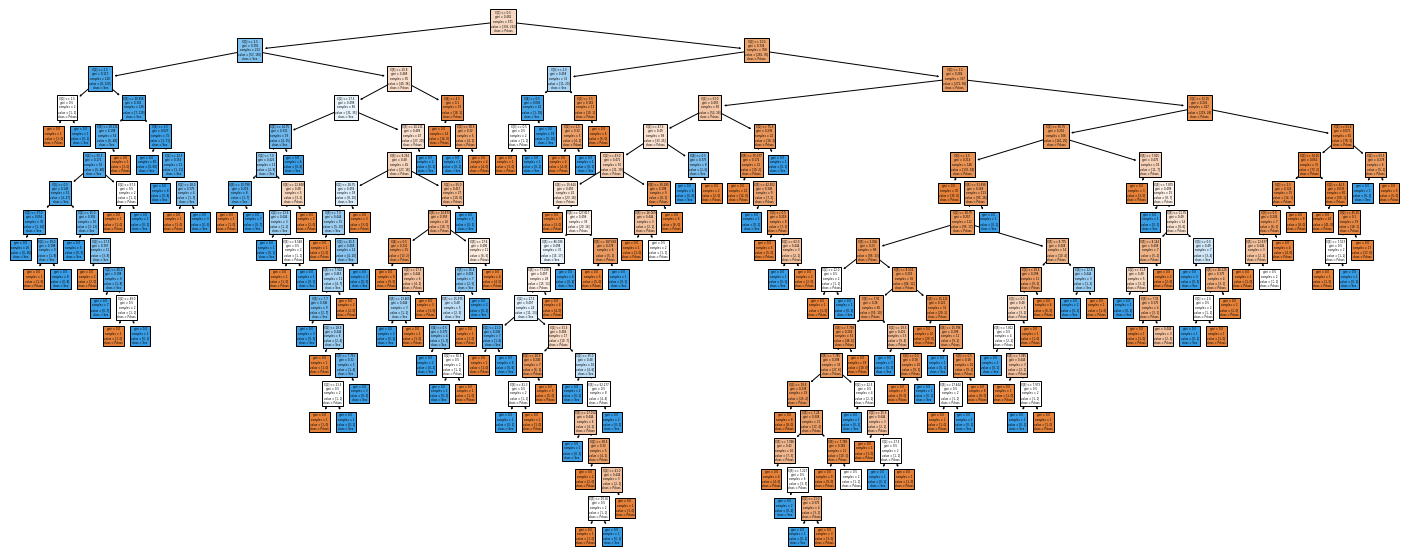

In [14]:
from sklearn import tree
plt.figure(figsize=(25,10))
import graphviz
tree.plot_tree(dc_model, 
                   feature_names=None,  
                   class_names=x.columns.values,
                   filled=True)
plt.show()

## Pre-pruning Decision Trees

We will now look at how we can better the accuracy of the decision tree by pre pruning. This involves training  the dataset with varying features of parameters of the decision tree till we find the best one out of the lot

In [16]:
from sklearn.model_selection import GridSearchCV
grid = {'criterion': 'gini',
        'max_depth': range(1,30),
        'min_samples_split' : range(1,10),
        'min_samples_leaf' : range(1,5)
}

dc_prepruned = DecisionTreeClassifier()
grid_search = GridSearchCV(dc_prepruned,param_grid=grid,cv=10,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 2088 candidates, totalling 20880 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [18]:
print("Best Parameters : {} ".format(grid_search.best_params_))
dc_pre_best = grid_search.best_estimator_

Best Parameters : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2} 


In [20]:
y_pred_prepruned = dc_pre_best.predict(x_test)
y_train_prepruned = dc_pre_best.predict(x_train)
y_test_prepruned = dc_pre_best.predict(x_test)

test_accuracy_prepruned = accuracy_score(y_train_prepruned,y_train)
train_accuracy_prepruned = accuracy_score(y_test_prepruned,y_test)

print("Train Accuracy Score : {}".format(test_accuracy_prepruned))
print("Test Accuracy Score : {}".format(train_accuracy_prepruned))

Train Accuracy Score : 0.840630472854641
Test Accuracy Score : 0.8111888111888111


In [21]:
print("Train Confusion Matrix \n {}".format(confusion_matrix(y_train_prepruned,y_train)))
print("\n Test Confusion Matrix \n {}".format(confusion_matrix(y_test_prepruned,y_test)))

Train Confusion Matrix 
 [[326  78]
 [ 13 154]]

 Test Confusion Matrix 
 [[83 25]
 [ 2 33]]


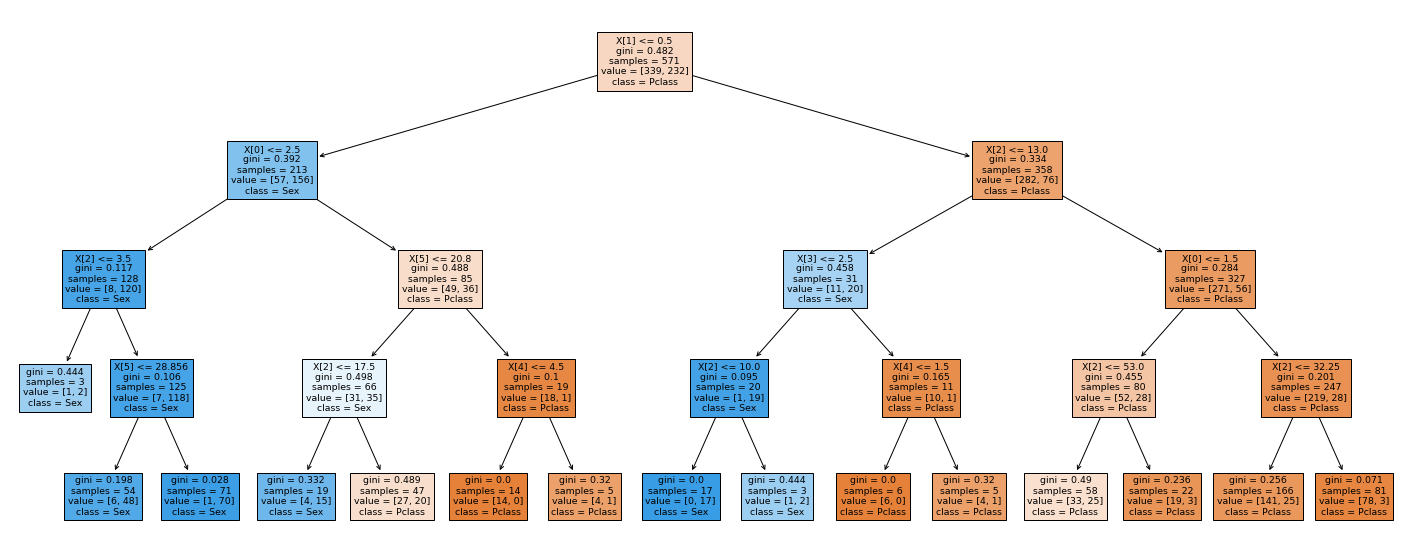

In [22]:
plt.figure(figsize=(25,10))
tree.plot_tree(dc_pre_best, 
                   feature_names=None,  
                   class_names=x.columns.values,
                   filled=True)
plt.show()

## Post-pruning Decision Trees

Let's look at the other method of pruning decision trees. In post-pruning, we build the whole tree and then prune it back to make the decision tree. Here we prune the branches of decision tree using cost_complexity_pruning technique. ccp_alpha, the cost complexity parameter, parameterizes this pruning technique. Think of it as a regularization parameter which adds a  penalty on everytime you have more leaves in the tree

In [30]:
post_dc_model = DecisionTreeClassifier(random_state=1)
post_path = post_dc_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = post_path.ccp_alphas, post_path.impurities

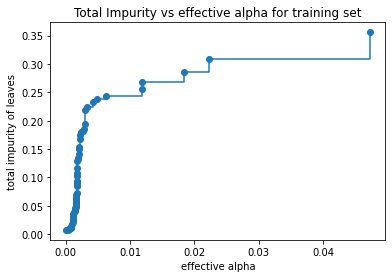

In [32]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12653205714985633


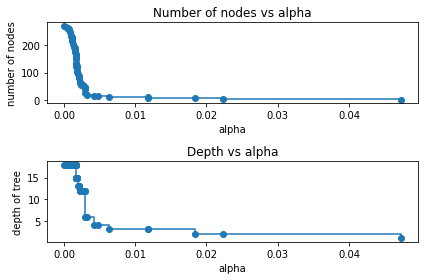

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

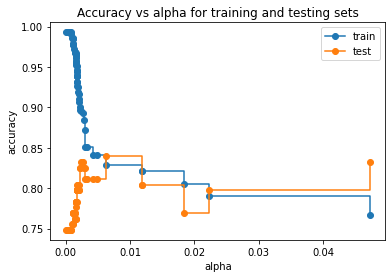

In [37]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()